In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("fake_or_real_news.csv")

In [3]:
dt.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
dt = dt.set_index("Unnamed: 0")

In [5]:
dt.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:

# Checking how balanced the observation groups are.
dt.label.value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
#Set `y` 
y = dt.label 
 
# Drop the `label` column 
dt.drop("label", axis=1) 
 
# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(dt['text'], y, test_size=0.33, random_state=53)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [10]:
# Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [14]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000ft,000km,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [17]:
clf = MultinomialNB()

accuracy:   0.857
Confusion matrix, without normalization


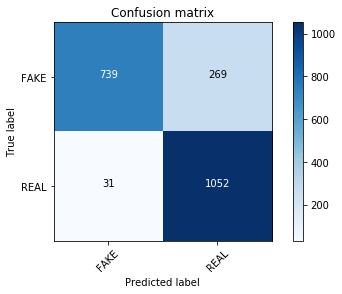

In [18]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
#rocauc = metrics.roc_auc_score(y_test, pred, average='weighted')
print ("accuracy:   %0.3f" % score)
#print ("ROC_AUC score:  %.3f" % rocauc)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [22]:
%matplotlib inline
#!conda install -c conda-forge tldextract -y
#!conda install -c conda-forge/label/gcc7 tldextract -y
#!pip install tldextract
import time
import re
import tldextract

In [23]:
f = pd.read_csv('fake.csv')

In [24]:
f.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [25]:
f.type.value_counts()

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64

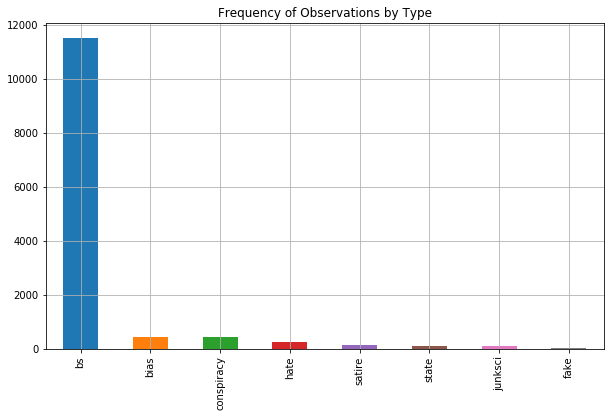

In [26]:

plt.figure(figsize=(10,6))
f.type.value_counts().plot(kind='bar',title = 'Frequency of Observations by Type', grid = True)

In [27]:
len(f.language.unique())

16

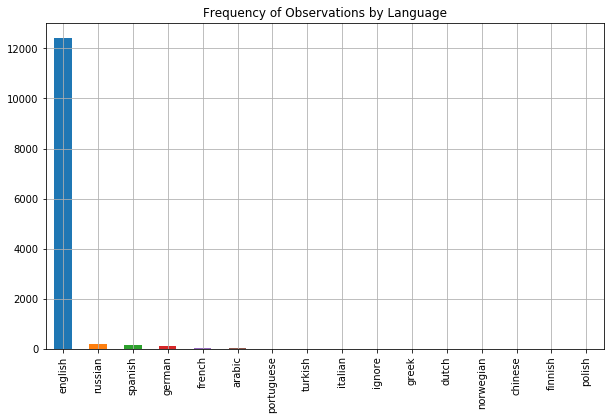

In [28]:
plt.figure(figsize=(10,6))
f.language.value_counts().plot(kind='bar',title = 'Frequency of Observations by Language', grid = True)

In [37]:
l = []
for i in range(len(f.text)):
    l.append(len(str(f.text[i])))
l = pd.DataFrame(l)
f['textlen'] = l
f.head()

,url,title,text,label,wing,conspiracy,satire,textlen
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE,0-unknown,0,0,505
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,0-unknown,0,0,1789
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,FAKE,0-unknown,0,0,1363
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,0-unknown,0,0,2095
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,0-unknown,0,0,1255


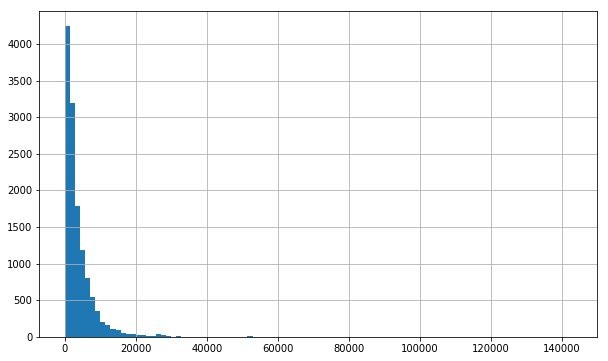

In [30]:
plt.figure(figsize=(10,6))
f.textlen.hist(bins = 100)

In [32]:
#f = f[(f.type == 'bs')|(f.type == 'fake')]
f = f[f.language == 'english']
f = f[(f.textlen > 500)&(f.textlen < 12000)]
f = f[['site_url', 'title', 'text']]
f.reset_index(drop = 'index', inplace=True)
f.rename(columns = {'site_url':'url'}, inplace=True)
print(f.shape)
f.head()

(9940, 3)


,url,title,text
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...


In [38]:
f.url.value_counts()

yournewswire.com               100
occupydemocrats.com            100
politicususa.com               100
conservativetribune.com        100
waterfordwhispersnews.com      100
thedailymash.co.uk             100
theonion.com                   100
thefederalistpapers.org        100
madworldnews.com               100
trunews.com                     99
naturalnews.com                 99
thespoof.com                    99
liberalamerica.org              99
libertyunyielding.com           99
opednews.com                    99
ifyouonlynews.com               99
infowars.com                    98
pravdareport.com                98
eutimes.net                     98
topinfopost.com                 97
frontpagemag.com                97
freedomoutpost.com              97
truthfeed.com                   97
antiwar.com                     96
dcclothesline.com               96
clickhole.com                   96
thedailysheeple.com             96
fellowshipoftheminds.com        96
wnd.com             

In [40]:
f.url.value_counts()[:200].sum()

9900

In [41]:
f.url.value_counts()

yournewswire.com               100
occupydemocrats.com            100
politicususa.com               100
conservativetribune.com        100
waterfordwhispersnews.com      100
thedailymash.co.uk             100
theonion.com                   100
thefederalistpapers.org        100
madworldnews.com               100
trunews.com                     99
naturalnews.com                 99
thespoof.com                    99
liberalamerica.org              99
libertyunyielding.com           99
opednews.com                    99
ifyouonlynews.com               99
infowars.com                    98
pravdareport.com                98
eutimes.net                     98
topinfopost.com                 97
frontpagemag.com                97
freedomoutpost.com              97
truthfeed.com                   97
antiwar.com                     96
dcclothesline.com               96
clickhole.com                   96
thedailysheeple.com             96
fellowshipoftheminds.com        96
wnd.com             

In [34]:
f['label'] = 'FAKE'

In [35]:
f['wing'] = '0-unknown'
f['conspiracy'] = 0
f['satire'] = 0

In [36]:
f.head()

,url,title,text,label,wing,conspiracy,satire
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE,0-unknown,0,0
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,0-unknown,0,0
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,FAKE,0-unknown,0,0
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,0-unknown,0,0
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,0-unknown,0,0


In [42]:

f.loc[f.url.str.contains('consortiumnews|usatoday|politifact|sctimes|timesofsandiego'),'wing'] = '4-center'
f.loc[f.url.str.contains('presstv|mintpressnews|latimes|chicagotribune|bustle|natmonitor|politico'),'wing'] = '3-center left'
f.loc[f.url.str.contains('antiwar|russia-insider|sputniknews|strategic-culture|postbulletin|hpenews|ustfactsdaily'),'wing'] = '5-center right'
f.loc[f.url.str.contains('politicususa|opednews|liberalamerica|truthdig|counterpunch|blackagendareport|guardianlv|ahtribune|intrepidreport|wakingtimes|addictinginfo|activistpost|other98|countercurrents|huffingtonpost|rabble|cnn'),'wing'] = '2-left'
f.loc[f.url.str.contains('naturalnews|ijr|wearechange|awdnews|twitchy|thenewamerican|amtvmedia|abovetopsecret|nowtheendbegins|thecommonsenseshow|fromthetrenchesworldreport|nakedcapitalism|prisonplanet|investmentwatchblog|ronpaulinst|thecontroversialfiles|gulagbound|rt|thedailybell|corbettreport|zerohedge|whatreally|wikileaks|newstarg|regated|southfront'),'wing'] = '6-right'
f.loc[f.url.str.contains('occupydemocrats|ifyouonlynews|pravdareport|usuncut|newcenturytimes|trueactivist|dailynewsbin'),'wing'] = '1-extreme left'
f.loc[f.url.str.contains('madworldnews|thefederalistpapers|conservativetribune|libertyunyielding|truthfeed|freedomoutpost|frontpagemag|dccl|othesline|wnd|ihavethetruth|amren|barenakedislam|returnofkings|trunews|jewsnews|shtfplan|lewrockwell|dailystormer|libertynews|endingthefield|dailywire|vdare|100percentfedup|21stcenturywire|westernjournalism|redflagnews|libertywritersnews|conservativedailypost|departed|breitbart|donaldtrumpnews.co|bipartisanreport|americanlookout|spinzon|usapoliticsnow|usanewsflash|hangthebankers|toprightnews|usasupreme|americasfreedomfighters|viralliberty'),'wing'] = '7-extreme right'

In [43]:
f.loc[f.url.str.contains('yournewswire|trunews|naturalnews|infowars|eutimes|truthfeed|topinfopost|thedailysheeple|jewsnews|wearechange|awdnews|worldtruth|govtslaves|thetruthseeker.co|amtvmedia|sott|abovetopsecret.com|collective-evolution.com|shtfplan.com|theeventchronicle.com|thefreethoughtproject.com|humansarefree.com|veteranstoday.com|lewrockwell.com|nowtheendbegins.com|thecommonsenseshow.com|themindunleashed.comfromthetrenchesworldreport.com|intellihub.com|realfarmacy.com|greanvillepost.com|dailystormer.com|disclose.tv|whydontyoutrythis.com|prisonplanet.com|investmentwatchblog.com|thecontroversialfiles.net|godlikeproductions.com|anonhq.com|abeldanger.net|wakingtimes.com |gulagbound.com|endingthefed.com|healthimpactnews.com|truthbroadcastnetwork.com|21stcenturywire.com|corbettreport.com|undergroundhealth.com|zerohedge.com|geoengineeringwatch.org|conservativedailypost.com|pakalertpress.com|whatreallyhappened.com|coasttocoastam.com|trueactivist.com|activistpost.com|theantimedia.org|usapoliticsnow.com|newstarget.com|theearthchild.co.za|anonews.co|southfront.org|americasfreedomfighters.com|davidwolfe.com|vigilantcitizen.com'),'conspiracy'] = 1

In [44]:
f.loc[f.url.str.contains('waterfordwhispersnews|theonion|thedailymash|thespoof|clickhole|newsthump|newsbiscuit|theunrealtimes|dailysquib|adobochronicles|gomerblog|thelastlineofdefense|satirewire|reductress'),'satire'] = 1

In [45]:

f.wing.value_counts()

0-unknown          4723
7-extreme right    2037
6-right            1775
2-left              679
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

In [46]:
f.head()

,url,title,text,label,wing,conspiracy,satire,textlen
0,100percentfedup.com,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,FAKE,7-extreme right,0,0,505
1,100percentfedup.com,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,FAKE,7-extreme right,0,0,1789
2,100percentfedup.com,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,FAKE,7-extreme right,0,0,1363
3,100percentfedup.com,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,FAKE,7-extreme right,0,0,2095
4,100percentfedup.com,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,FAKE,7-extreme right,0,0,1255


0-unknown          4723
7-extreme right    2037
6-right            1775
2-left              679
5-center right      273
1-extreme left      249
3-center left       204
Name: wing, dtype: int64

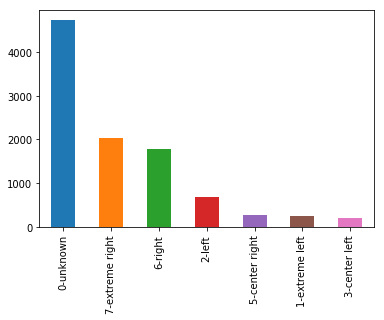

In [47]:
f.wing.value_counts().plot(kind = 'bar')
f.wing.value_counts()

In [49]:
z_z = pd.DataFrame()
z_ = []
for i in sorted(f.wing.unique()):
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(f[f.wing == i].text)
    cvecdata = cvec.transform(f[f.wing == i].text)
    df = pd.DataFrame(cvecdata.todense(),
                     columns = cvec.get_feature_names())
    z_ = pd.DataFrame(df.sum())
    z_.columns = ["sums"]
    z_ = pd.DataFrame(z_.sums.sort_values(ascending=False)[:100]/float(z_.sum())*100)
    z_z = pd.concat([z_z,z_], axis = 1)
z_z.columns = f.wing.unique()
z_z.dropna(inplace = True)
print(z_z.shape)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if sys.path[0] == '':


(29, 7)


In [51]:
z_z = z_z[sorted(f.wing.unique())]
z_z['mean'] = z_z.mean(axis=1)
z_z = z_z.sort_values(by = "mean", ascending=False)[:10]
z_z.to_csv("fake_word_freq.csv")
z_z

,0-unknown,1-extreme left,2-left,3-center left,5-center right,6-right,7-extreme right,mean
trump,2.383475,0.729491,0.345683,0.896126,0.296505,0.924053,0.531415,0.872392
clinton,0.720949,0.706431,0.626210,1.005061,0.395339,0.582718,0.534787,0.653071
said,0.463840,0.407162,0.892259,0.507625,0.413436,0.293532,0.381961,0.479974
people,0.444730,0.489806,0.508570,0.455381,0.324345,0.532150,0.444233,0.457031
hillary,0.531591,0.424330,0.231662,0.791822,0.224118,0.297878,0.339850,0.405893
2016,0.436044,0.366934,0.571915,0.330142,0.199062,0.235458,0.253769,0.341903
election,0.644511,0.264764,0.244331,0.375532,0.136420,0.323557,0.271453,0.322938
new,0.307489,0.309200,0.298626,0.308095,0.328522,0.325137,0.317762,0.313547
president,0.408248,0.297755,0.238901,0.294756,0.300681,0.271804,0.222736,0.290697
just,0.491635,0.264259,0.166507,0.354967,0.158693,0.258371,0.330973,0.289344


In [52]:
df.head()

,00,000,000km,001,007,00o,01,015,018,02,...,ź300,ź4,ź50,за,эa,эin,эthe,إنفوجرافيك,السعودية,ノhillbro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:

f.groupby('wing').sum()

,conspiracy,satire,textlen
wing,,,
0-unknown,1905,741,16911266
1-extreme left,9,0,663779
2-left,8,0,2959198
3-center left,0,0,611842
5-center right,0,0,829091
6-right,901,0,6902980
7-extreme right,567,0,6268499


In [54]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(f[f.satire == 1].text)
cvecdata = cvec.transform(f[f.satire == 1].text)
df = pd.DataFrame(cvecdata.todense(),
                 columns = cvec.get_feature_names())
z_ = pd.DataFrame(df.sum())
z_.columns = ["percent"]
z_ = pd.DataFrame(z_.percent.sort_values(ascending=False)[:100]/float(z_.sum())*100)
z_.head(10)

,percent
trump,0.769656
just,0.656520
said,0.539255
like,0.451719
2016,0.442635
people,0.425293
time,0.407125
new,0.403822
election,0.346015
day,0.331150


In [55]:
# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(f.text)
y = f.label

In [56]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [57]:
pred = clf.predict(tfidf_test)

In [58]:
pred_df = pd.DataFrame(pred)
pred_df[0].value_counts()

FAKE    7355
REAL    2585
Name: 0, dtype: int64

In [59]:
score = metrics.accuracy_score(y, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.740
